In [7]:
import pandas as pd
import collections
import matplotlib.pyplot as plt

In [8]:
def load_data(folder_path, data_type):        
    with open(folder_path + data_type + ".txt", 'r') as file:
        header_data = file.readlines()
        header_data = [line.strip() for line in header_data]
    if '3' in folder_path:
        return pd.DataFrame({'Header' : header_data})
    with open(folder_path + data_type + "-label.txt", 'r') as file:
        label_data = file.readlines()
        label_data = [line.strip() for line in label_data]    
    return pd.DataFrame({'Header' : header_data, 'Label' : label_data})

def get_byte_sequence(header_series):
    all_header_string = "".join(header_series.tolist())
    header_double_byte_list = [all_header_string[i:i+2] for i in range(0, len(all_header_string), 2)]
    return header_double_byte_list

Text(0.5, 1.0, 'Byte Frequency Histogram Protocol-3')

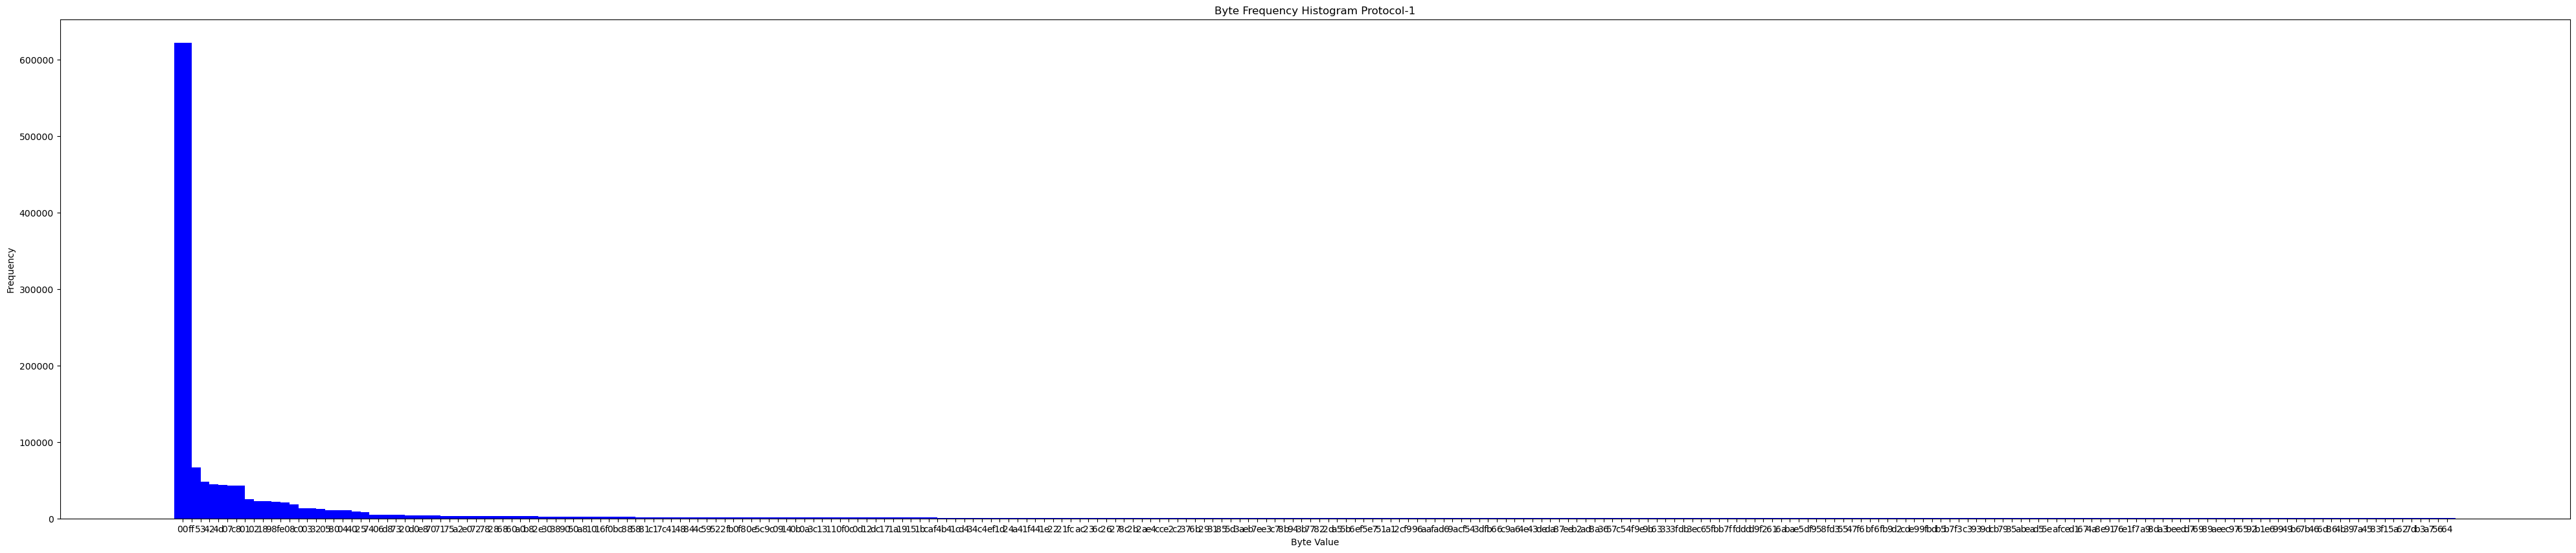

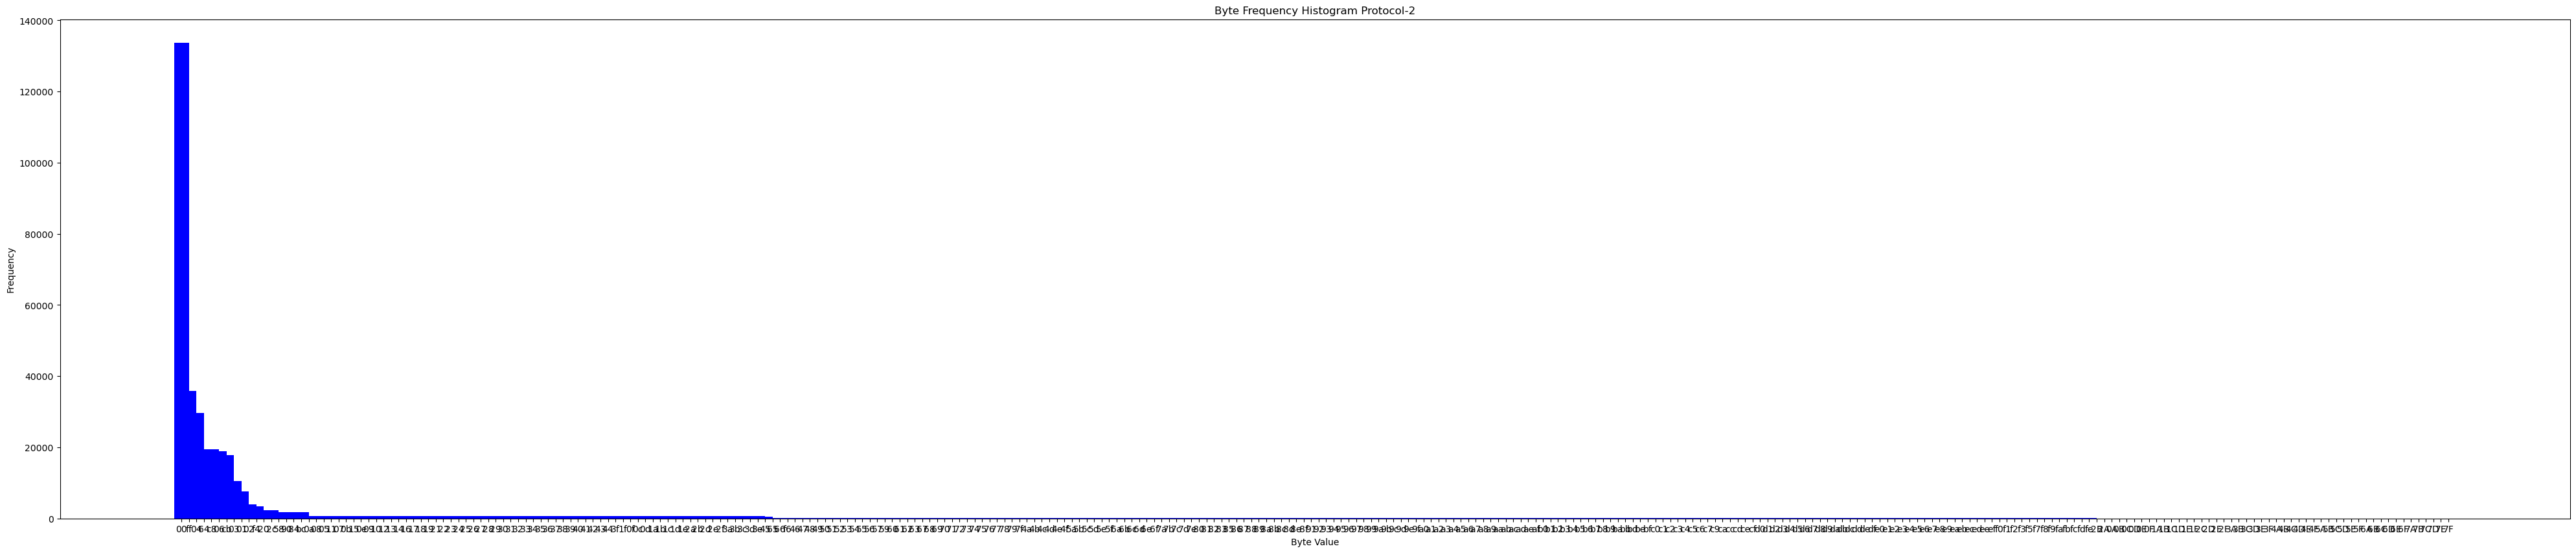

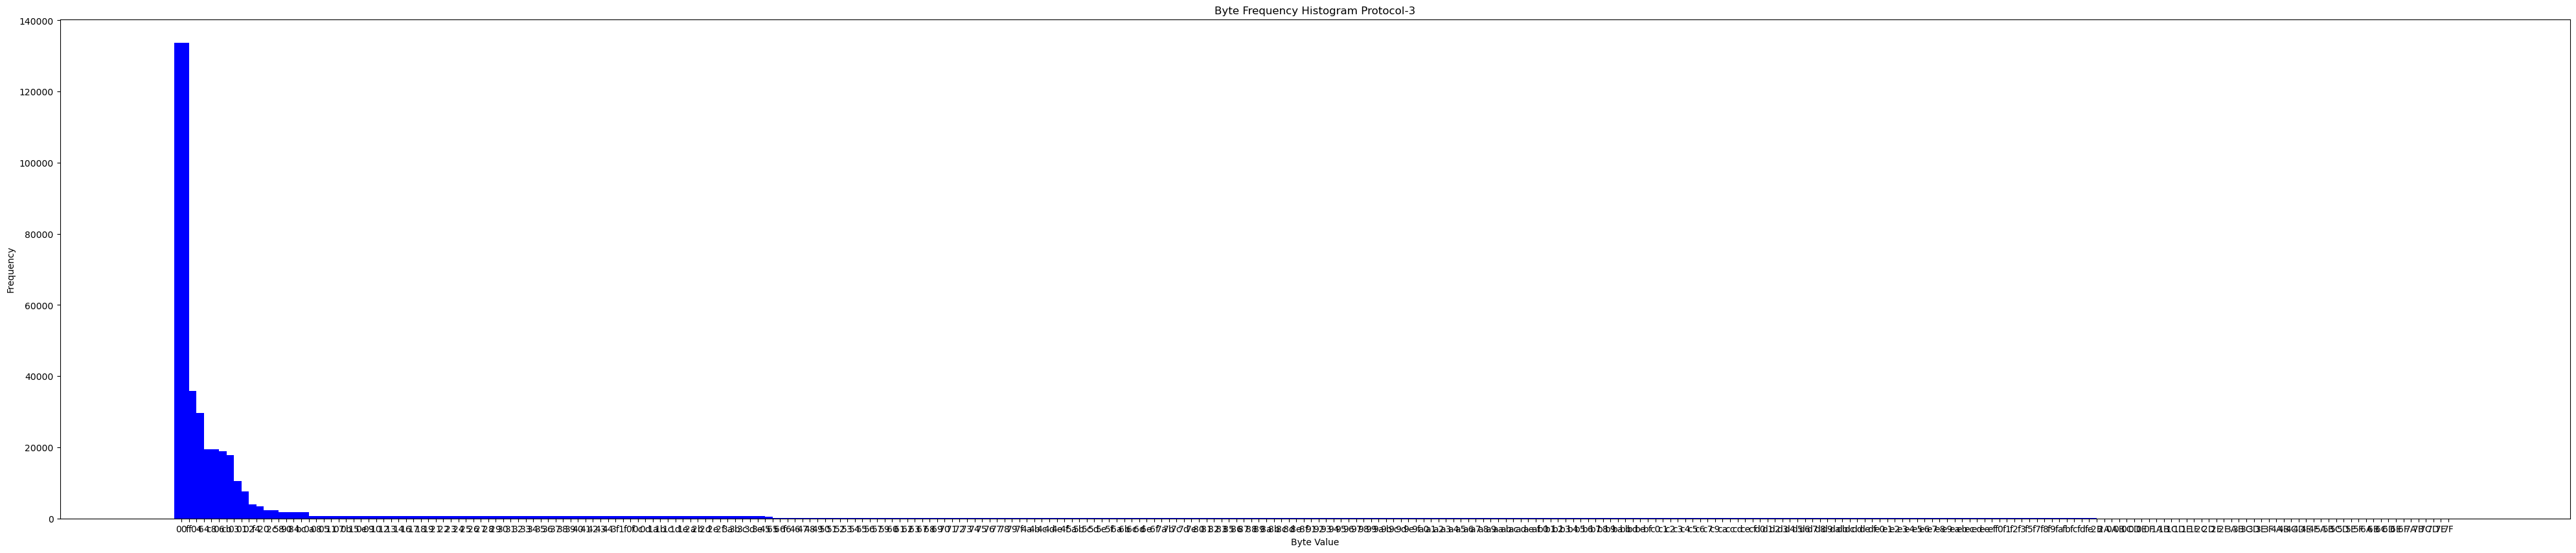

In [9]:
# Histogram Plots
train_one = load_data("./data/protocol1/", "train")
train_two = load_data("./data/protocol2/", "train")
train_three = load_data("./data/protocol3/", "train")
train_one_bytes_list = get_byte_sequence(train_one["Header"])
train_two_bytes_list = get_byte_sequence(train_two["Header"])
train_three_bytes_list = get_byte_sequence(train_three["Header"])

byte_counts_one = collections.Counter(train_one_bytes_list)
byte_counts_two = collections.Counter(train_two_bytes_list)
byte_counts_three = collections.Counter(train_two_bytes_list)

byte_counts_sorted_one = dict(sorted(byte_counts_one.items(), key = lambda x : x[1], reverse = True))
byte_counts_sorted_two = dict(sorted(byte_counts_two.items(), key = lambda x : x[1], reverse = True))
byte_counts_sorted_three = dict(sorted(byte_counts_two.items(), key = lambda x : x[1], reverse = True))

bytes_one = list(byte_counts_sorted_one.keys())
frequencies_one = list(byte_counts_sorted_one.values())
bytes_two = list(byte_counts_sorted_two.keys())
frequencies_two = list(byte_counts_sorted_two.values())
bytes_three = list(byte_counts_sorted_three.keys())
frequencies_three = list(byte_counts_sorted_three.values())

plt.figure(figsize=(50,10))
plt.bar(bytes_one, frequencies_one, width=2, color='blue')
plt.xlabel('Byte Value')
plt.ylabel('Frequency')
plt.title('Byte Frequency Histogram Protocol-1')

plt.figure(figsize=(50,10))
plt.bar(bytes_two, frequencies_two, width=2, color='blue')
plt.xlabel('Byte Value')
plt.ylabel('Frequency')
plt.title('Byte Frequency Histogram Protocol-2')

plt.figure(figsize=(50,10))
plt.bar(bytes_three, frequencies_three, width=2, color='blue')
plt.xlabel('Byte Value')
plt.ylabel('Frequency')
plt.title('Byte Frequency Histogram Protocol-3')